# Initial Steps

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-09-01     21050
2019-10-01     34121
2019-11-01     30100
2019-12-01     52396
2020-01-01     35979
2020-02-01     33208
2020-03-01     51330
2020-04-01     43714
2020-05-01     45012
2020-06-01     88314
2020-07-01     86007
2020-08-01     79449
2020-09-01     75733
2020-10-01     88805
2020-11-01     84784
2020-12-01    107079
2021-01-01     90663
2021-02-01     87891
2021-03-01    106013
2021-04-01     98397
2021-05-01     99696
2021-06-01    142998
2021-07-01    140690
2021-08-01    134132
2021-09-01    130416
2021-10-01    143488
2021-11-01    139467
2021-12-01    161762
2022-01-01    145346
2022-02-01    142575
2022-03-01    160696
2022-04-01    153080
2022-05-01    154379
2022-06-01    197681
2022-07-01    195373
2022-08-01    188816
2022-09-01    185099
2022-10-01    198171
2022-11-01    194150

# Preparing Data For Data Driven Forecasting

## Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

## Creating MAPE Function

In [3]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Splitting Data

In [4]:
Train = df.drop(df.tail(12).index)
Train

quantity
date                
2019-09-01     21050
2019-10-01     34121
2019-11-01     30100
2019-12-01     52396
2020-01-01     35979
2020-02-01     33208
2020-03-01     51330
2020-04-01     43714
2020-05-01     45012
2020-06-01     88314
2020-07-01     86007
2020-08-01     79449
2020-09-01     75733
2020-10-01     88805
2020-11-01     84784
2020-12-01    107079
2021-01-01     90663
2021-02-01     87891
2021-03-01    106013
2021-04-01     98397
2021-05-01     99696
2021-06-01    142998
2021-07-01    140690
2021-08-01    134132
2021-09-01    130416
2021-10-01    143488
2021-11-01    139467

In [5]:
Test = df.tail(12)
Test

quantity
date                
2021-12-01    161762
2022-01-01    145346
2022-02-01    142575
2022-03-01    160696
2022-04-01    153080
2022-05-01    154379
2022-06-01    197681
2022-07-01    195373
2022-08-01    188816
2022-09-01    185099
2022-10-01    198171
2022-11-01    194150

# Model Building

## 1. Moving Average

In [6]:
# Moving Average for the time series
mv_pred = df["quantity"].rolling(12).mean()
mv_pred.tail(12)
MAPE(mv_pred.tail(12), Test.quantity)

14.116481335050374

## 2. Simple Exponential Smoothing

In [7]:
ses_model = SimpleExpSmoothing(Train["quantity"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.quantity)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


18.08671995462116

## 3. Holt's method 

In [8]:
hw_model = Holt(Train["quantity"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


5.818858606356994

## 4. Holts Winter Exponential Smoothing with Additive Seasonality & Additive Trend

In [9]:
hwe_model_add_add = ExponentialSmoothing(Train["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


6.910015058125068

## 5. Holts Winter Exponential Smoothing with Multiplicative Seasonality & Additive Trend

In [10]:
hwe_model_mul_add = ExponentialSmoothing(Train["quantity"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


7.776989754255967

# Forecasting

## 1. Getting Data For Forecasting

In [12]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Dehire/Wooden/wooden_data_to_forecast.csv"

In [13]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2 = df2.set_index('date')
df2

Empty DataFrame
Columns: []
Index: [2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00, 2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00, 2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00, 2023-09-01 00:00:00, 2023-10-01 00:00:00, 2023-11-01 00:00:00]

## 3. Best Model

In [14]:
model_full = ExponentialSmoothing(df["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## 4. Forecasting

In [15]:
pred_new = pd.Series(model_full.predict(start = df2.index[0], end = df2.index[-1]))
pred_new

2022-12-01    215046.616504
2023-01-01    197271.507650
2023-02-01    193141.488695
2023-03-01    209903.968188
2023-04-01    200929.644895
2023-05-01    200869.408653
2023-06-01    242812.690360
2023-07-01    239146.075942
2023-08-01    231229.734133
2023-09-01    224778.226461
2023-10-01    237854.813726
2023-11-01    232488.582371
Freq: MS, dtype: float64

In [16]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

forecasted_quantity
date                           
2022-12-01        215046.616504
2023-01-01        197271.507650
2023-02-01        193141.488695
2023-03-01        209903.968188
2023-04-01        200929.644895
2023-05-01        200869.408653
2023-06-01        242812.690360
2023-07-01        239146.075942
2023-08-01        231229.734133
2023-09-01        224778.226461
2023-10-01        237854.813726
2023-11-01        232488.582371

## 5. Finding Residuals

In [17]:
full_res = df.quantity - model_full.predict(start = df.index[0], end = df.index[-1])
full_res

date
2019-09-01   -23268.745118
2019-10-01     -673.605605
2019-11-01     1335.915682
2019-12-01     1403.916849
2020-01-01     1404.384808
2020-02-01     1405.172608
2020-03-01     1405.570105
2020-04-01     1404.249673
2020-05-01     1403.999380
2020-06-01     1404.341568
2020-07-01     1405.119866
2020-08-01     1403.738811
2020-09-01     2786.195726
2020-10-01       70.764930
2020-11-01     1353.843625
2020-12-01     1401.805433
2021-01-01     1403.766852
2021-02-01     1402.598689
2021-03-01     1403.938785
2021-04-01     1402.648794
2021-05-01     1403.398143
2021-06-01     1402.769325
2021-07-01     1402.518324
2021-08-01     1402.109754
2021-09-01     2782.770650
2021-10-01       72.691295
2021-11-01     1350.655461
2021-12-01     1400.094442
2022-01-01     1402.160605
2022-02-01     1401.999832
2022-03-01     1401.366627
2022-04-01     1401.021672
2022-05-01     1401.796579
2022-06-01     1401.170487
2022-07-01     1400.919216
2022-08-01     1401.510993
2022-09-01     2778.380

## 6. ACF Plot on Residuals

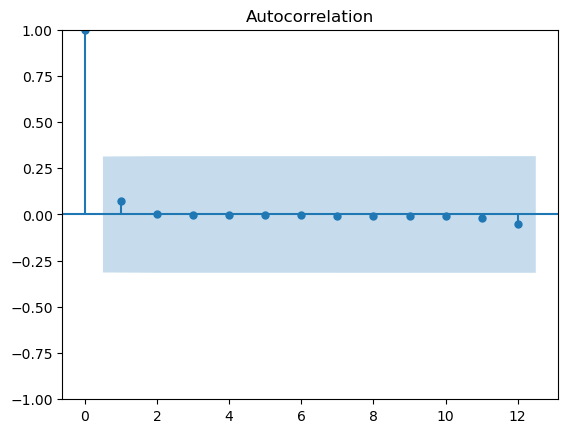

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


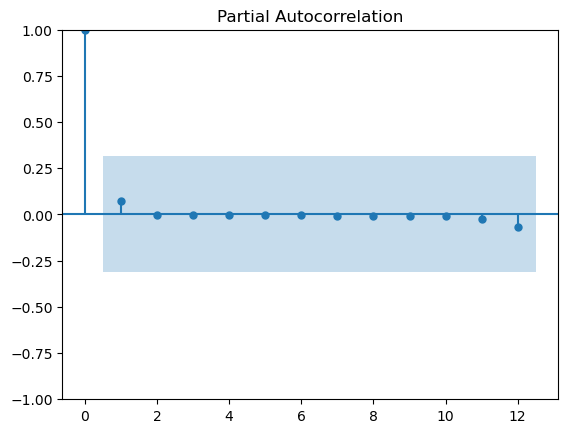

In [19]:
tsa_plots.plot_pacf(full_res, lags=12);

## 8. Autoregression Model

In [20]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const    1294.833418
y.L1        0.073624
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     1394.039628
1     1397.467907
2     1397.720310
3     1397.738893
4     1397.740261
5     1397.740362
6     1397.740369
7     1397.740370
8     1397.740370
9     1397.740370
10    1397.740370
11    1397.740370
dtype: float64

In [22]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

forecasted_quantity    Residuals
date                                        
2022-12-01        215046.616504  1394.039628
2023-01-01        197271.507650  1397.467907
2023-02-01        193141.488695  1397.720310
2023-03-01        209903.968188  1397.738893
2023-04-01        200929.644895  1397.740261
2023-05-01        200869.408653  1397.740362
2023-06-01        242812.690360  1397.740369
2023-07-01        239146.075942  1397.740370
2023-08-01        231229.734133  1397.740370
2023-09-01        224778.226461  1397.740370
2023-10-01        237854.813726  1397.740370
2023-11-01        232488.582371  1397.740370

In [23]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

forecasted_quantity    Residuals  final_forecast
date                                                        
2022-12-01        215046.616504  1394.039628   216440.656132
2023-01-01        197271.507650  1397.467907   198668.975557
2023-02-01        193141.488695  1397.720310   194539.209005
2023-03-01        209903.968188  1397.738893   211301.707081
2023-04-01        200929.644895  1397.740261   202327.385156
2023-05-01        200869.408653  1397.740362   202267.149015
2023-06-01        242812.690360  1397.740369   244210.430730
2023-07-01        239146.075942  1397.740370   240543.816311
2023-08-01        231229.734133  1397.740370   232627.474503
2023-09-01        224778.226461  1397.740370   226175.966831
2023-10-01        237854.813726  1397.740370   239252.554096
2023-11-01        232488.582371  1397.740370   233886.322740

# Forecasting Result

<AxesSubplot:xlabel='date'>

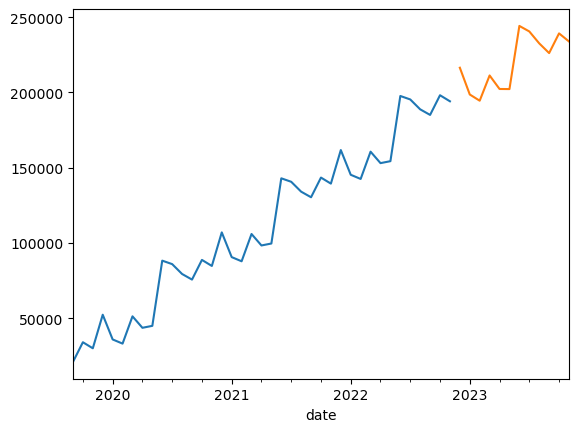

In [24]:
df.quantity.plot()
df3.final_forecast.plot()

# Saving Forecasted Data

In [25]:
df3.to_csv('data_driven_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Dehire\\Wooden'